In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import math, operator

In [2]:
im1 = Image.open('./images/img1.jpg')

In [3]:
resized_PIL = im1.resize((300, 300), resample=Image.BILINEAR)

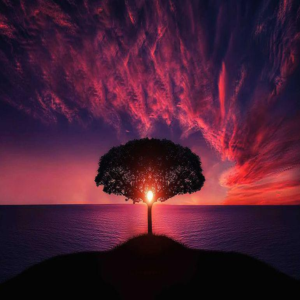

In [4]:
resized_PIL

In [5]:
im2 = cv2.imread('./images/img1.jpg')

In [6]:
resized_cv2 = cv2.resize(im2,(300,300),interpolation = cv2.INTER_LINEAR)

In [7]:
cv2.imshow('img',resized_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
def calculate_Ratio(img,size):
    height, width = img.shape[:2]
    newHeight, newWidth = size

    xRatio = width / newWidth
    yRatio = height / newHeight
    
    return (xRatio,yRatio)

def find_coordinates(xRatio,yRatio,i,j,height,width):
    x = int(xRatio * j)
    y = int(yRatio * i)

    xDiff = (xRatio * j) - x
    yDiff = (yRatio * i) - y

    x1 = int(x + 1) if x < width - 1 else x
    y1 = int(y + 1) if y < height - 1 else y
    
    return x,y,xDiff,yDiff,x1,y1

def resizeBI(img, size):
    
    (xRatio,yRatio) = calculate_Ratio(img,size)
    
    height,width = img.shape[:2]
    newHeight,newWidth = size
    final_img = np.zeros((newHeight, newWidth, 3))

    for i in range(newHeight):
        for j in range(newWidth):
            
            x,y,xDiff,yDiff,x1,y1 = find_coordinates(xRatio,yRatio,i,j,height,width)
            
            final_img[i, j] = (
                                img[y, x] * (1 - xDiff) * (1 - yDiff) +
                                 img[y, x1] * (xDiff) * (1 - yDiff) +
                                 img[y1, x] * (yDiff) * (1 - xDiff) +
                                 img[y1, x1] * (xDiff * yDiff)
                            )
    return final_img

In [9]:
user_img = resizeBI(im2,(300,300))

In [10]:
user_img = [[[round(i) for i in j] for j in k] for k in user_img]


In [11]:
# user_img = cv2.convertScaleAbs(user_img)
user_img = np.clip(user_img, 0, 255)
user_img = np.array(user_img, dtype=np.uint8)

In [12]:
cv2.imshow('img1',user_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
def rmse(image1, image2):
    # Ensure that the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    # Calculate the mean squared error between the images
    mse = np.mean((image1 - image2) ** 2)
    # Take the square root of the mean squared error to get the root mean squared error
    rmse = np.sqrt(mse)
    return rmse

In [14]:
rmse(resized_cv2,user_img)


3.820005817331231

Text(0.5, 1.0, 'Resize (part b)')

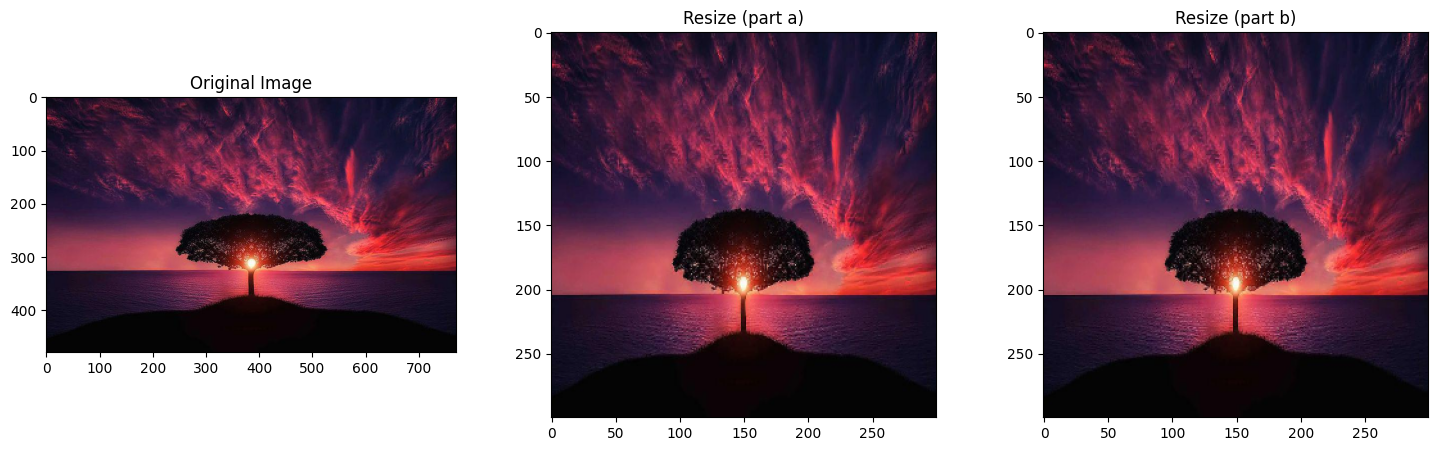

In [15]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(im2[...,::-1]); plt.title('Original Image')
plt.subplot(132); plt.imshow(resized_cv2[...,::-1]); plt.title('Resize (part a)')
plt.subplot(133); plt.imshow(user_img[...,::-1]); plt.title('Resize (part b)')